# PHY3009 Tutorial Week 9: Introduction to Numpy, fitting a straight line & Linear Least Squares fitting

---

This is a python jupyter notebook. If you haven't used this before: you basically click on the little "play" icon above to run code in a section. The sections are called "cells". You can just write code in a cell and execute it by clicking on the "play" symbol or pressing Shift + Enter on your keyboard. You can also add explanatory text to your jupyter notebook by writing text in a cell and then selecting "Markdown" or "Raw NBConvert" in the little drop-down menu next to the "play" and "stop" buttons.

The first cell will import some of the basic packages that we will be using throughout this course. Numpy is a package that contains, among other things, a range of mathematical functions, and options to work with arrays. matplotlib.pyplot contains plotting functions.

In this cell, you will notice that we import each of them in a different way. For numpy, we are importing the entire package, but for matplotlib we are only importing pyplot. The 'as' in the import command allows you to select a different (typically shorter) name for the package, to make it quicker to use.

If you need help with a particular build-in function or a function from a module you have imported, simply type a ‘?’ before the name of the function to see the help-page (this may not exist for every function, but should be available for most of the standard ones).

'#' in cells will turn the following text into a comment, you can also comment a whole block by using ''' commment '''

You can add a Cell after the one you are currently in by hitting the '+' button in the bar at the top, or by first hitting the escape key on your keyboard and then pressing 'b'. You can also split a cell in two at the position your cursor is at, by pressing ctrl+shift+'-'. More keyboard shortcuts can be found by clicking the keyboard icon in the bar at the top.

---

In [2]:
# importing some basic python packages
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as ascii # to help with reading in data later

# next line is makes plots conveniently appear in this notebook
%matplotlib inline

Numpy is a very useful package to do numerical work on (large arrays), and in this tutorial, we will take a quick look at some of the basic functions. The documentation for numpy is available at https://numpy.org/doc/stable/

There are many build-in packages for Python that will help you with fitting. However, it is instructive to write some of your own routines to try and fit different datasets. This tutorial is aimed at fitting some simple data using Least Squares fitting, as well as using some techniques to try and get uncertainties on the best fit parameters.



# Part 1: Numpy

Numpy contains some useful routines, including the np.arange function that you can use to fill an array with numbers going from a start to an endpoint. If you want, you can also specify a stepsize. 

If you don't specify the starting value, np.arange will start from 0. Also note, that numpy treats it as a half-open interval with \[start point, endpoint), i.e. the last number is not included. 

You can also make arrays of a specific size filled with all 0s or 1s using np.zeros() and np.ones(), respectively.

In [2]:
#Making some basic arrays and printing them. 
arr1 = np.arange(0, 15)
arr1b = np.arange(15)
arr2 = np.arange(1, 16)/10.
arr3 = np.arange(0.1,1.6,0.1)

print(arr1)
print(arr1b)
print(arr2)
print(arr3)

arr4 = arr1 + arr2
arr5 = arr2 / arr3
print(arr4)
print(arr5)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]
[ 0.1  1.2  2.3  3.4  4.5  5.6  6.7  7.8  8.9 10.  11.1 12.2 13.3 14.4
 15.5]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**Exercise 1**: Make an array between 4 and 16 with steps of 0.15 and multiply it by 15.

In [3]:
a=np.arange(4,16,0.15)
b=a*15
print(a)
print(" ")
print(b)

[ 4.    4.15  4.3   4.45  4.6   4.75  4.9   5.05  5.2   5.35  5.5   5.65
  5.8   5.95  6.1   6.25  6.4   6.55  6.7   6.85  7.    7.15  7.3   7.45
  7.6   7.75  7.9   8.05  8.2   8.35  8.5   8.65  8.8   8.95  9.1   9.25
  9.4   9.55  9.7   9.85 10.   10.15 10.3  10.45 10.6  10.75 10.9  11.05
 11.2  11.35 11.5  11.65 11.8  11.95 12.1  12.25 12.4  12.55 12.7  12.85
 13.   13.15 13.3  13.45 13.6  13.75 13.9  14.05 14.2  14.35 14.5  14.65
 14.8  14.95 15.1  15.25 15.4  15.55 15.7  15.85]
 
[ 60.    62.25  64.5   66.75  69.    71.25  73.5   75.75  78.    80.25
  82.5   84.75  87.    89.25  91.5   93.75  96.    98.25 100.5  102.75
 105.   107.25 109.5  111.75 114.   116.25 118.5  120.75 123.   125.25
 127.5  129.75 132.   134.25 136.5  138.75 141.   143.25 145.5  147.75
 150.   152.25 154.5  156.75 159.   161.25 163.5  165.75 168.   170.25
 172.5  174.75 177.   179.25 181.5  183.75 186.   188.25 190.5  192.75
 195.   197.25 199.5  201.75 204.   206.25 208.5  210.75 213.   215.25
 217.5  219.7

Numpy has most mathematical functions built-in, and these functions can operate directly on all the array elements (even for multi-dimensional arrays) without the need of a for-loop. However, you need to make sure that the arrays you are using are of the same dimensions. You can check the size of a numpy array by using the .shape attribute. 

y  has 126 elements
y2 has 100 elements
y3 has 80 elements


ValueError: operands could not be broadcast together with shapes (126,) (100,) 

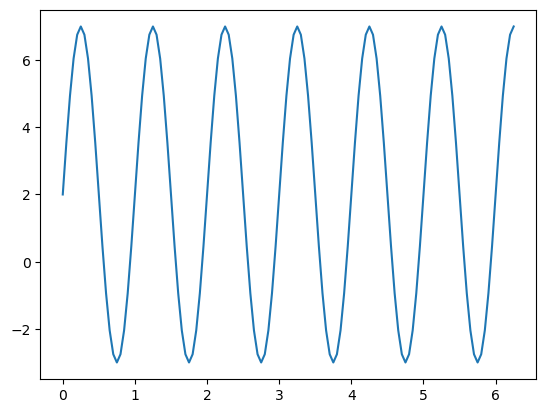

In [4]:
x=np.arange(0,6.28,0.05)
y=5.*np.sin(2.*np.pi*x)+2


x2=np.arange(0,5,0.05)
y2=5.*np.sin(3.*2.*np.pi*x2)+3.

x3=np.arange(0,4,0.05)
y3=np.cos(2.*np.pi*x3)+1.


#plot the y as a function of x
plt.plot(x,y)

#get the sizes of y and y2
#print("y  has {0:} elements\ny2 has {1:} elements\n".format(y.shape,y2.shape))

#or if we want a nicer formatting we can index .shape with [0] to get the first element::
#print("y  has {0:d} elements\ny2 has {1:d} elements".format(y.shape[0],y2.shape[0]))

print("y  has {0:d} elements\ny2 has {1:d} elements\ny3 has {2:d} elements".format(y.shape[0],y2.shape[0],y3.shape[0]))
#the following will fail, as they have different dimensions:
print(y+y2)

**Exersise 2:** Make a plot for y and y2 and for y and y3 for the elements they have in common without hardcoding the number of elements in (i.e. although y\[0:100\]+y2 would work, this would fail if we try it for y3)

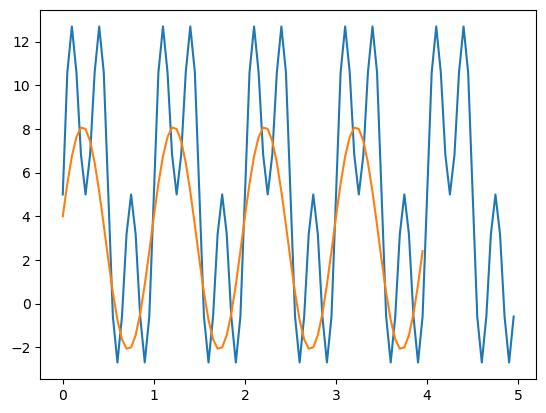

In [7]:
# solved incorrectly

x=np.arange(0,6.28,0.05)
y=5.*np.sin(2.*np.pi*x)+2


x2=np.arange(0,5,0.05)
y2=5.*np.sin(3.*2.*np.pi*x2)+3.

x3=np.arange(0,4,0.05)
y3=np.cos(2.*np.pi*x3)+1.

arry=(y.shape[0],y2.shape[0])
a=min(arry)
b=(y[0:a]+y2[0:a])
plt.plot(x[0:a],b)

ary=(y.shape[0],y3.shape[0])
a=min(ary)
b=(y[0:a]+y3[0:a])
plt.plot(x[0:a],b)

You can change the shape of numpy arrays and turn a 1-dimensional array into a 2 or more dimensional array or vice versa by using the reshape function associated with a numpy array. The total number of elements needs to be the same, before and after, so you can't reshape a 95-element array into a 10 by 10 array.

In [8]:
x=np.arange(100) %10
x_2d=x.reshape(10,10)
print(x_2d)

[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]


Numpy also has other operators that affect the shapes of the output, including the sum(), std(), min(), and max() functions. These functions typically also allow you to operate only across 1 dimension of an array (e.g. to take the sum along columns or rows for a 2d array and get a 1d array).

In [9]:
#look get the sum over the entire array and find the minimum and maximum values for the entire array.
print('Sum: {0:} ; Min: {1:} ; Max: {2:}'.format(np.sum(x_2d),np.min(x_2d),np.max(x_2d)))

#you can also get the sum over the first or second axis:
print('Sum over the first axis:  {0:}'.format(np.sum(x_2d,0)))  #column
print('Sum over the second axis: {0:}'.format(np.sum(x_2d,1)))  #row


Sum: 450 ; Min: 0 ; Max: 9
Sum over the first axis:  [ 0 10 20 30 40 50 60 70 80 90]
Sum over the second axis: [45 45 45 45 45 45 45 45 45 45]


The np.random library has a range of random number generators. Let's get a 200x200 array of random numbers from the normal distribution.

In [10]:
random_grid=np.random.normal(size=(200,200))

print(random_grid)

[[-0.13389532  1.11887641  1.17965321 ...  0.37723347  0.51718055
   0.89842692]
 [ 2.18267194  0.27256817  1.65766785 ...  0.27533464  0.1116664
   1.10864053]
 [ 0.96235863 -0.23236241  0.70814829 ...  1.29609981 -0.6882585
   0.9023061 ]
 ...
 [ 0.52981036  0.64599209  0.46620962 ...  0.30998028 -0.81457053
  -2.12158433]
 [-1.07886736  1.37522007 -0.32231823 ... -1.05749822 -0.51363696
   0.27178052]
 [-0.61775694  0.37601382  0.65006239 ... -1.39257781 -0.09078359
  -0.71188354]]


**Exercise 3:** Plot the mean, median, standard deviation, minimum and maximum for both the rows and columns of the random_grid defined above. Also print these values for the entire array.

total mean= 0.008837687195775589
total median= 0.005324944999580014
total Std= 0.9964657156830343
total min= -5.026261366826795
total max= 4.03127855725764


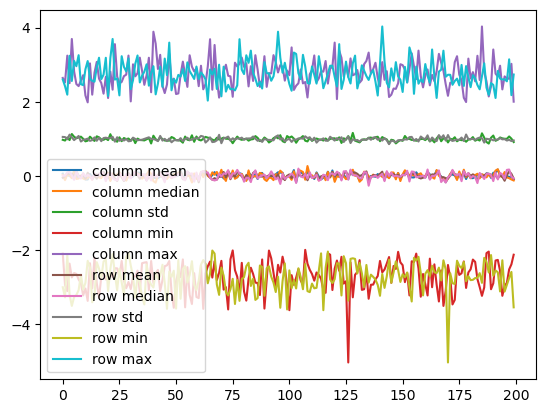

In [11]:
t=np.arange(200)

plt.plot(t,np.mean(random_grid,0))
plt.plot(t,np.median(random_grid,0))
plt.plot(t,np.std(random_grid,0))
plt.plot(t,np.min(random_grid,0))
plt.plot(t,np.max(random_grid,0))

plt.plot(t,np.mean(random_grid,1))
plt.plot(t,np.median(random_grid,1))
plt.plot(t,np.std(random_grid,1))
plt.plot(t,np.min(random_grid,1))
plt.plot(t,np.max(random_grid,1))

plt.legend(["column mean","column median","column std","column min","column max","row mean","row median","row std","row min","row max"])
print("total mean=",np.mean(random_grid))
print("total median=",np.median(random_grid))
print("total Std=",np.std(random_grid))
print("total min=",np.min(random_grid))
print("total max=",np.max(random_grid))

You can use the plt.hist() function to make histogram plots. The plt.vlines() and plt.hlines() functions can be used to draw lines.

**Exercise 4:** Plot a histogram for the entire random_grid array and overplot the mean, median and the mean +/- 1 sigma (68 % confidence interval) values as vertical lines. Try to plot a normalised histogram and overplot the normal distribution to compare, for this you will need to plot a histogram with at least 50 bins.

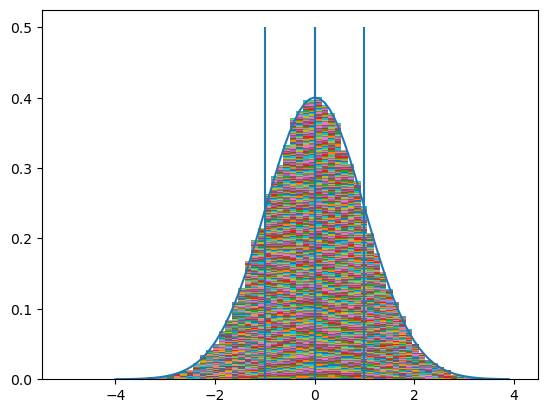

In [12]:
plt.hist(random_grid,bins=70,density=True,stacked=True)
plt.vlines(np.mean(random_grid),0,0.5)
plt.vlines(np.median(random_grid),0,0.5)
plt.vlines(np.std(random_grid),0,0.5)
plt.vlines(-np.std(random_grid),0,0.5)
u=[]
for x in np.arange(-4,4,0.1):
    norm=(1/(np.std(random_grid)*(np.sqrt(2*np.pi))))*(np.exp(-0.5*(((x-np.mean(random_grid))/np.std(random_grid))**2)))
    u.append(norm)

plt.plot(np.arange(-4,4,0.1),u)

# Part 2: Fitting a straight line

**Exercise 5a:**
write a function that calculates the slope and intercept of a straight line between the points (x0,y0) and (x1,y1) and test it with a few different sets of coordinates as listed in the second cell.

In [13]:
#Your function
m=(y1-y0)/(x1-x0)
print("slope is ",m)
#y=mx+c   x=(y-c)/m   c=y-mx
c=y1-(m*x1)
print("y intercept is ",c)
print("x intercept is ",(-c/m))

NameError: name 'y1' is not defined

In [14]:
#coordinates 1
x0,y0=0,0
x1,y1=10,10


#coordinates 2
x0,y0=np.pi,np.exp(3)
x1,y1=np.exp(2.),np.exp(2.6)

#Your function
m=(y1-y0)/(x1-x0)
print("slope is ",m)
#y=mx+c   x=(y-c)/m   c=y-mx
c=y1-(m*x1)
print("x=0, y intercept is ",c)

#coordinates 3
x0,y0=0,0
x1,y1=10,20

#coordinates 4
x0,y0=-50,0
x1,y1=210,10




slope is  -1.5590007950391154
x=0, y intercept is  24.9832823678232


The above determination of the slope and intercept is a very simple, it can only accept two points and by itself, it does not allow for uncertainties on the measurements to be taken into account, so you can't use it directly to determine the uncertainties on the slope and intercept. One way to try and find the uncertainties is to perturb the points by a random number drawn from a probability distribution with a width equal to the uncertainty that is centred on the value above, rerun the calculation and repeat this process a large number of times. If for each iteration you store the best fit value of the slope and the intercept, you can then make a histogram for both the slope and intercept, and determine the mean and standard deviation. 

**Exercise 5b:** Try this for one of the sets of the coordinates above (you can choose which). You can assume that the points only have an uncertainty in the y-direction, and that data points follow the normal distribution in the y direction centred on the value listed in the cell above with a standard deviation of 1. Calculate the mean and standard deviation of the slope and intercept based on 1000 iterations, and compare this to the results you got in the cell above.

In [15]:
x0,y0=np.pi,np.exp(3)
x1,y1=np.exp(2.),np.exp(2.6)

grad=[]
yint=[]
rand_grid=np.random.normal(size=(2,1000))
for i in range(1000):
    ya=y0+(0.1*y0*rand_grid[0][i])
    yb=y1+(0.1*y1*rand_grid[1][i])
    m=(yb-ya)/(x1-x0)
    c=yb-(m*x1)
    grad.append(m)
    yint.append(c)
avgrad=np.mean(grad)
stdgrad=np.std(grad)
avint=np.mean(yint)
stdint=np.std(yint)
print("mean slope is",avgrad," Std is",stdgrad)
print("x=0, mean y intercept is ",avint," Std is",stdint)



mean slope is -1.5820489025351439  Std is 0.5735242356758744
x=0, mean y intercept is  25.1621287554839  Std is 3.6467572803120363


Typically, the distributions of the parameters are not fully symmetric. In this case, you can determine the uncertainties by determining the 16% - 84% confidence interval (technically, ~15.8655% - ~84.1345%) by sorting the data, and taking the value that at 16% of the total sample, and subtracting the median, and taking the value at 84% of the total sample and subtracting the median. You best fit value is the median of the distribution.

**Exercise 5b:**Below, determine the uncertainties in your fit this way. Hint: You can use the 'shape' attribute of a numpy array to get its size and you can use the .sort() function to sort it. 

In the above, we are dealing with only 2 data points. In most experiments in physics we will have a (much) larger number of points, and we can't calculate the slope and intercept using the method above. Instead, in first instance we can use Least Squares fitting to determine the best fit parameters. 

**Exercise 6:** Below is a simple set of data with some noise added. Write a Least Squares function that will determine the values of the slope and intercept and compare it to the values provided. 

<ErrorbarContainer object of 3 artists>

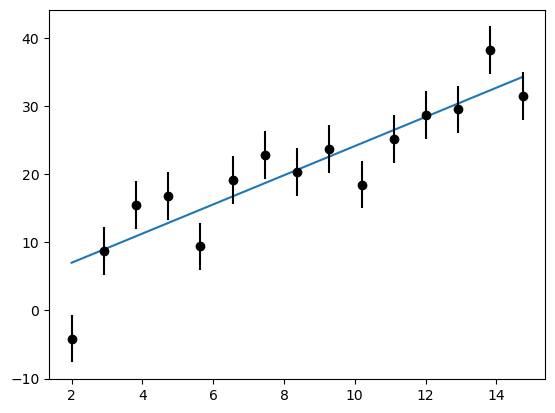

In [16]:
#generate the fake data and show what we would expect.
m = np.pi-1.   #True slope of the data
b = np.exp(1.) #True intercept of the data
noise_level=3.5   #value of the standard deviation for the noise
x = np.arange(2.,15.,0.91)  #x-array for data
y = m*x + b   #y-array for data (no noise)
#Plot the data noise-free
plt.plot(x,y)
y = y + np.random.normal(0,noise_level,y.shape[0])  #add some noise to the data
plt.errorbar(x,y,yerr=noise_level,fmt='ko') #overplot the data with noise and include errorbars

real m is 2.141592653589793 least squares m is 2.3190023439058467
real b is 2.718281828459045 least squares b is 2.326976498302239


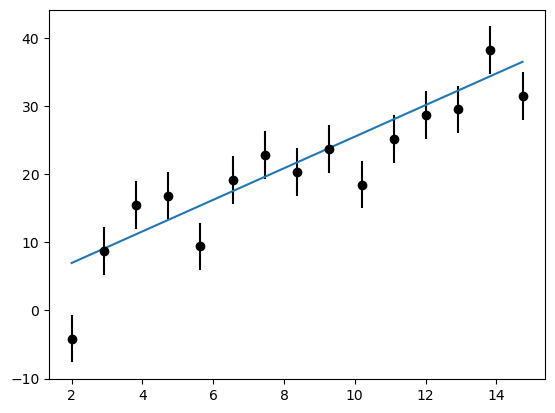

In [17]:
plt.errorbar(x,y,yerr=noise_level,fmt='ko')
N=x.shape[0]
m_lestsquares=(((N*sum(x*y))-(sum(x)*sum(y)))/(N*sum(x**2)-(sum(x)**2)))
b_lestsquares=(sum(y)-(m*sum(x)))/N
y_new=m_lestsquares*x+b_lestsquares
plt.plot(x,y_new)
print("real m is",m,"least squares m is",m_lestsquares)
print("real b is",b,"least squares b is",b_lestsquares)

**Exercise 6b:** Make a plot of the data with their uncertainties and overplot the best fit model. To see how good your model is, make a plot of the residuals (i.e. the difference between your data and the model), and include errorbars as appropriate.

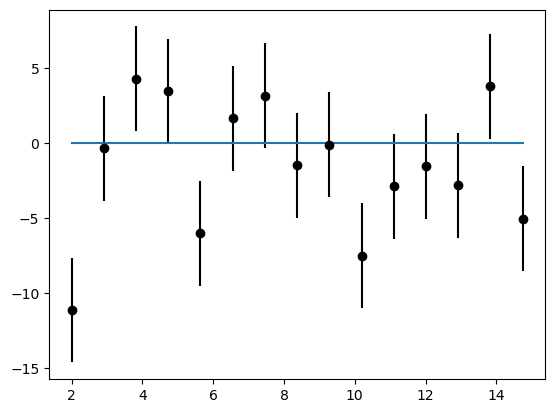

In [18]:
plt.errorbar(x,y-y_new,yerr=noise_level,fmt='ko')
plt.plot(x,y*0)

**Exercise 7:** On the Canvas page you should find a file called SNIalow.dat. This file contains the redhshifts and magnitudes of Type Ia supernovae, and can be used to calculate the Hubble constant, _H0_, which is given by the equation $v = H_0 d$ (where $v = c*z$ with $c$ the speed of light and $z$ the redshift). The columns are listed as the redshift, $z$, the apparent magnitude, $m$, and the uncertainty on the magnitude, $\sigma_m$

In the cell below, you are shown how to read in this data.

In [3]:
# here's how to read in some data:
data = ascii.read('SNIalow.dat')
# print out what the three different columns inside the data set are:
print(data.colnames)

['z', 'mag', 'e_mag']


In [4]:
#print the redshifts for the SNes
print(data['z'])   

  z  
-----
 0.03
 0.05
0.026
0.075
0.026
0.014
0.101
 0.02
0.036
0.045
0.043
0.018
0.079
0.088
0.063
0.071
0.052
 0.05


After reading in the data, we need to convert it into a form for which we can determine $H_0$. To do this, we need to multiply the redshift by the speed of light (in this case in km/s) to get the velocity, and we can calculate the distance in _MPc_. The following calculates the distance in _Pc_: $d = 10^{( \frac{m-M}{5}+1)}$ with M=-19.0$\pm$0.4. **Exercise 7a:** Do this in the cell below, and don't forget to propagate your uncertainties and calculate $\sigma_d$.

In [5]:
c=299792 #km/s
#cerr=1
z=data['z']
v=c*z #km/s
verr=1*z  # only askes for derr
m=data['mag']
d=(10**(((m+19)/5)+1))/(1000000)  #MPc
exponetal_uncert=np.sqrt((data['e_mag']**2)+(0.4**2))/5
derr=((10**(((m+19)/5)+1))/(1000000))*np.log(10)*exponetal_uncert #np.log is the natural log
#hub=v/d
#huberr=hub*np.sqrt(((verr/v)**2)+((derr/d)**2))  # only askes for derr

#print(hub,huberr)
print("average Hubbles constant is",np.mean(hub),"Km/s/MPc")   

average Hubbles constant is 73.37951841705481 Km/s/MPc


**Exercise 7b:** Now that you have converted the data, you can use your Linear Least Squares function, made for Exercise 6, to determine the value of the Hubble constant. Do so below. Make a plot of the data with the best fit model overplotted as well as a plot of the residuals.

least squares gradient is 0.014396050981340731
least squares intercept is -9.398109448684707
least squares Hubbles constant is 69.46349393289438


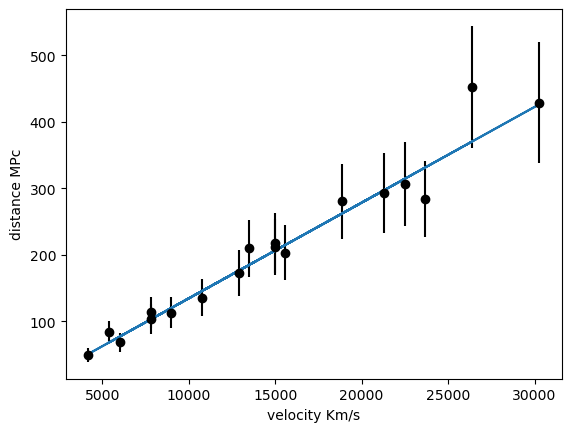

In [44]:

N=data['z'].shape[0]

# y=m*x+b
v=c*z
def least_squares(x,y,sigma):

    S=np.sum(1/sigma**2)
    Sx=np.sum(x/sigma**2)
    Sy=np.sum(y/sigma**2)
    Sxy=np.sum((x*y)/sigma**2)
    Sxx=np.sum((x**2)/sigma**2)
    m_leastsquares=((S*Sxy)-(Sx*Sy))/((S*Sxx)-(Sx**2))
    b_leastsquares=((Sxx*Sy)-(Sx*Sxy))/((S*Sxx)-(Sx**2))
    
    return m_leastsquares,b_leastsquares
m,b=least_squares(v,d,derr)
d_new=m*v+b


plt.errorbar(v,d,xerr=verr,yerr=derr,fmt='ko')
plt.plot(v,d_new)

plt.xlabel('velocity Km/s')
plt.ylabel('distance MPc')
print("least squares gradient is",m_lestsquares)
print("least squares intercept is",b_lestsquares)
print("least squares Hubbles constant is",1/m_lestsquares)

Text(0, 0.5, 'Residual distance MPc')

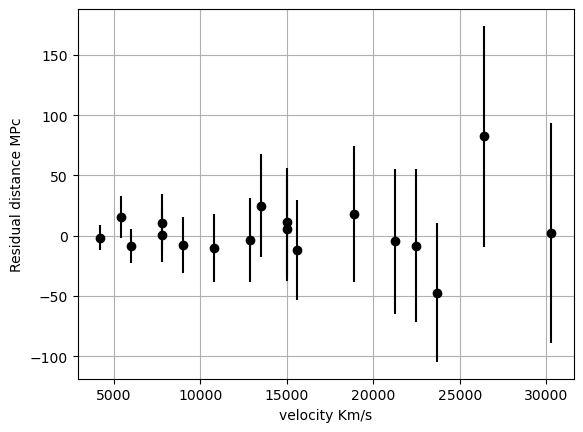

In [16]:
plt.errorbar(v,d-d_new,yerr=derr,fmt='ko')
plt.grid()
plt.xlabel('velocity Km/s')
plt.ylabel('Residual distance MPc')

Now, we want to get estimate the uncertainties on the derived Hubble constant. To do this, we are going to use the _bootstrap_ method: 

1) Calculate the best fit model and calculate the residuals (You will need to use these residuals for steps 2-5).
2) Label each data point
3) Draw at random a sample of N data _with replacement_ from the residuals (use a uniform random number generator) and add the best fit model to these points (note: N is the number of data points you have)
4) Recalculate the the best fit slope and intercept & store the results
5) Repeat this process as many times as possible

You can now make a histogram of the slopes and intercepts measured using this process and determine both the mean and standard deviation as well as the 16% - 84% confidence interval.

**Exercise 7c:** Perform the bootstrap analysis on the data.

mean is 69.50078749269946 std is 2.094269301281862
Hubbles constant is 69.50078749269946 std is
69.46064622120929


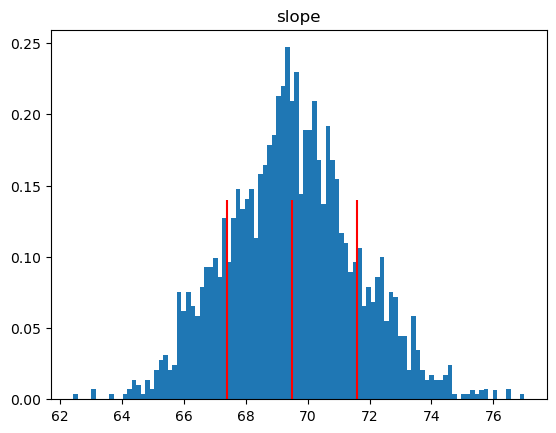

In [45]:
N=data['z'].shape[0]


m,b=least_squares(v,d,derr)
d_new=m*v+b
d_resid=d-d_new

slope=[]
intercep=[]

for q in range(2000):
    idx=np.random.randint(0,N,N)
    d_boot=d_resid[idx]+d_new
    m,b=least_squares(v,d_boot,derr[idx])
    slope.append(1/m)
    intercep.append(b)

plt.hist(slope,bins=100,density=True,stacked=True)
plt.title("slope")
plt.vlines(np.mean(slope),0,0.140,color='red')
plt.vlines(np.mean(slope)+np.std(slope),0,0.140,color='red')
plt.vlines(np.mean(slope)-np.std(slope),0,0.140,color='red')
print("mean is",np.mean(slope),"std is",np.std(slope))
print("Hubbles constant is",np.mean(slope),"std is",)


mean is -8.956838927081291 std is 7.029395386105245


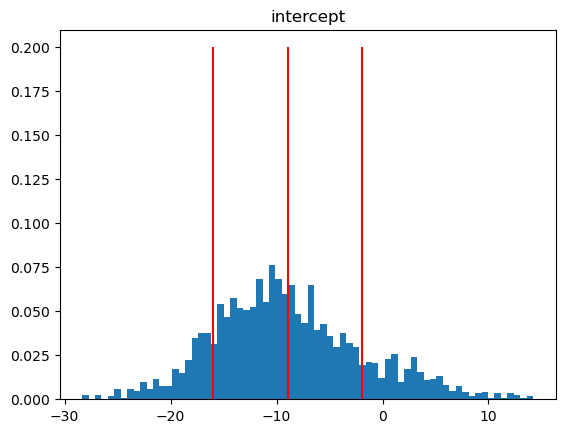

In [46]:
plt.hist(intercep,bins=70,density=True,stacked=True)
plt.title("intercept")
plt.vlines(np.mean(intercep),0,0.2,color='red')
plt.vlines(np.mean(intercep)+np.std(intercep),0,0.2,color='red')
plt.vlines(np.mean(intercep)-np.std(intercep),0,0.2,color='red')
print("mean is",np.mean(intercep),"std is",np.std(intercep))